In [462]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
import pickle #to save the model

In [463]:
#read dataSet
df = pd.read_csv("train_Data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Display the number of value null for every colums

In [464]:
df.isnull().sum().sort_values(ascending=False)

Loan_Status          367
Credit_History        79
Self_Employed         55
LoanAmount            27
Dependents            25
Gender                24
Loan_Amount_Term      20
Married                3
Loan_ID                0
Education              0
ApplicantIncome        0
CoapplicantIncome      0
Property_Area          0
dtype: int64

In [465]:
#display the statistical value
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [466]:
#display the categories value
df.describe(include="O")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,981,957,978,956,981,926,981,614
unique,981,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,775,631,545,763,807,349,422


In [467]:
df.loc[0]

Loan_ID              LP001002
Gender                   Male
Married                    No
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          5849
CoapplicantIncome         0.0
LoanAmount                NaN
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Urban
Loan_Status                 Y
Name: 0, dtype: object

In [468]:
#separte data to numeric dataFrame and object
obj_data= []
num_data= []

for index, type in enumerate(df.dtypes):
    if type== object :
        obj_data.append(df.iloc[:,index])
    else:
        num_data.append(df.iloc[:,index])

obj_data= pd.DataFrame(obj_data).transpose()
num_data= pd.DataFrame(num_data).transpose()

In [469]:
obj_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,Urban,NaN
977,LP002975,Male,Yes,0,Graduate,No,Urban,NaN
978,LP002980,Male,No,0,Graduate,No,Semiurban,NaN
979,LP002986,Male,Yes,0,Graduate,No,Rural,NaN


In [470]:
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
976,4009.0,1777.0,113.0,360.0,1.0
977,4158.0,709.0,115.0,360.0,1.0
978,3250.0,1993.0,126.0,360.0,NaN
979,5000.0,2393.0,158.0,360.0,1.0


For the obj_data (Categorical dataSets) we will replace the misssing value with the value are repeated several times

In [471]:
obj_data= obj_data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [472]:
obj_data.isnull().sum().any()

False

For the num_data (Numerical dataSets) we will replace the misssing value with previous values

In [473]:
num_data= num_data.fillna(method="bfill")

In [474]:
num_data.isnull().sum().any()

False

In [475]:
df.describe(include="O")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,981,957,978,956,981,926,981,614
unique,981,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,775,631,545,763,807,349,422


In [476]:
#transform colum target using Loaning_Status
target_value={"Y":1, "N":0}
target= obj_data['Loan_Status']

target= target.map(target_value)
target

0      1
1      0
2      1
3      1
4      1
      ..
976    1
977    1
978    1
979    1
980    1
Name: Loan_Status, Length: 981, dtype: int64

In [477]:
#drop traget colum from obj_data
obj_data.drop('Loan_Status',axis=1, inplace=True)
obj_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001002,Male,No,0,Graduate,No,Urban
1,LP001003,Male,Yes,1,Graduate,No,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,Urban
4,LP001008,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,Urban
977,LP002975,Male,Yes,0,Graduate,No,Urban
978,LP002980,Male,No,0,Graduate,No,Semiurban
979,LP002986,Male,Yes,0,Graduate,No,Rural


In [478]:
#transform categorical data to numerical value 1, 2, 3....
le=LabelEncoder()
for i in obj_data:
    obj_data[i]=le.fit_transform(obj_data[i])
    
   
obj_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
976,970,1,1,3,1,1,2
977,972,1,1,0,0,0,2
978,975,1,0,0,0,0,1
979,978,1,1,0,0,0,0


In [479]:
#Drop Load_id from obj_data
obj_data= obj_data.drop('Loan_ID', axis=1)
obj_data

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1,0,0,0,0,2
1,1,1,1,0,0,0
2,1,1,0,0,1,2
3,1,1,0,1,0,2
4,1,0,0,0,0,2
...,...,...,...,...,...,...
976,1,1,3,1,1,2
977,1,1,0,0,0,2
978,1,0,0,0,0,1
979,1,1,0,0,0,0


In [480]:
#Concatinate obj_data and num_data

X=pd.concat([obj_data, num_data],axis=1)

y=target


# End cleaning Data -----------------------------------

In [481]:
#dataSets for EDA : exploration data analysis
df=pd.concat([num_data,obj_data,target], axis=1)

In [482]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849.0,0.0,128.0,360.0,1.0,1,0,0,0,0,2,1
1,4583.0,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0
2,3000.0,0.0,66.0,360.0,1.0,1,1,0,0,1,2,1
3,2583.0,2358.0,120.0,360.0,1.0,1,1,0,1,0,2,1
4,6000.0,0.0,141.0,360.0,1.0,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
976,4009.0,1777.0,113.0,360.0,1.0,1,1,3,1,1,2,1
977,4158.0,709.0,115.0,360.0,1.0,1,1,0,0,0,2,1
978,3250.0,1993.0,126.0,360.0,1.0,1,0,0,0,0,1,1
979,5000.0,2393.0,158.0,360.0,1.0,1,1,0,0,0,0,1


In [483]:
target.value_counts()

1    789
0    192
Name: Loan_Status, dtype: int64

the mean of Yes loan is : 0.8042813455657493
the mean of No loan is : 0.19571865443425077


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


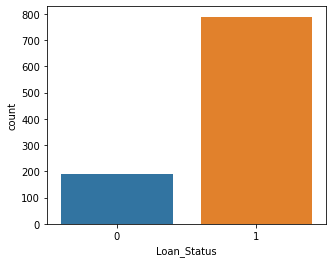

In [484]:
plt.figure(figsize=(5,4))
sns.countplot(target)

yes=len((target[target==1]))/len(target)
no=len((target[target==0]))/len(target)

print(f'the mean of Yes loan is : {yes}')
print(f'the mean of No loan is : {no}')

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


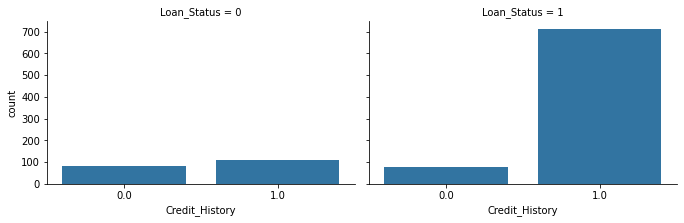

In [485]:
#show relation between accepted Loan && Credit_History
grid= sns.FacetGrid(df, col="Loan_Status", size=3.2, aspect=1.5)
grid.map(sns.countplot, 'Credit_History')

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


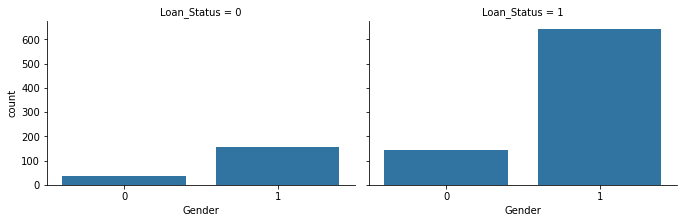

In [486]:
#show relation between accepted Loan && Gender
grid= sns.FacetGrid(df, col="Loan_Status", size=3.2, aspect=1.5)
grid.map(sns.countplot, 'Gender')

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


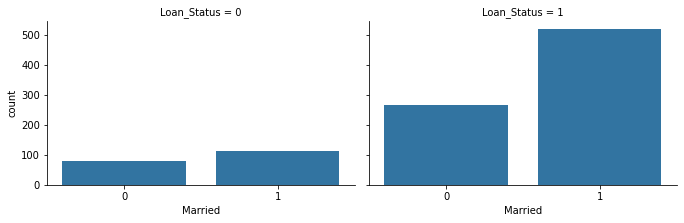

In [487]:
#show relation between accepted Loan && Married
grid= sns.FacetGrid(df, col="Loan_Status", size=3.2, aspect=1.5)
grid.map(sns.countplot, 'Married')

Text(0, 0.5, 'Loan Status')

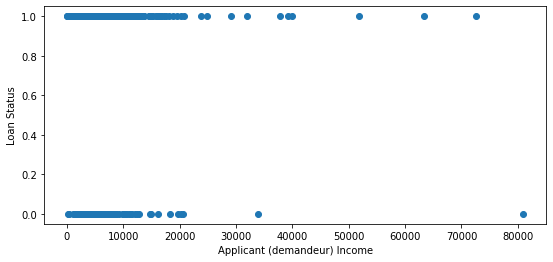

In [488]:
#loan applicant income
plt.figure(figsize=(9,4))
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])
plt.xlabel("Applicant (demandeur) Income")
plt.ylabel("Loan Status")

# Building Model ML ------------------

In [489]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [490]:
#devide dataSets to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Size of X_train : ",X_train.shape)
print("Size of X_test : ",X_test.shape)
print("Size of X_train : ",y_train.shape)
print("Size of y_test : ",y_test.shape)

Size of X_train :  (784, 11)
Size of X_test :  (197, 11)
Size of X_train :  (784,)
Size of y_test :  (197,)


In [491]:
# we will apply tree type of model of ML
models={
    'LogisticRegression':LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1, random_state=42)
}

#--------------------------------------------
#create function of precision
def accur(y_true, y_pred, retu=False):
    acc=accuracy_score(y_true, y_pred)
    if retu:
        return acc
    else:
        print("The precision of this model is : ", acc)

#--------------------------------------------
#Create the function of applying the models
def train_tes_eval(models,X_train, y_train, X_test, y_test):
    for name, model in models.items():
        print(name, ':')
        model.fit(X_train, y_train)
        accur(y_test, model.predict(X_test))
        print('-'*45)

#--------------------------------------------
train_tes_eval(models,X_train, y_train, X_test, y_test)

LogisticRegression :
The precision of this model is :  0.8121827411167513
---------------------------------------------
KNeighborsClassifier :
The precision of this model is :  0.7868020304568528
---------------------------------------------
DecisionTreeClassifier :
The precision of this model is :  0.8223350253807107
---------------------------------------------


===> we see that the model LinearRegression and DecisionTreeClassifier has a better accuracy

# Deploy the model

In [492]:
X2= X[['Credit_History','Married', 'CoapplicantIncome','ApplicantIncome','LoanAmount']]

In [493]:
#since the best model is LogisticRegression so we will choose them to apply it to our data (X)

classifier=DecisionTreeClassifier()
classifier.fit(X2,y)


DecisionTreeClassifier()

In [494]:
accuracy_score(y_test,classifier.predict(X_test[['Credit_History','Married', 'CoapplicantIncome','ApplicantIncome','LoanAmount']]))

0.9949238578680203

In [495]:
#Save the model
pickle.dump(classifier, open('model.pkl','wb'))